In [3]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input{font-family:Consolas; font-size:12pt;}
div.prompt {min width:70px;}
div#toc-wrapper {padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe {font-size:12px;}
</style>
"""))

<font size=6 color='red'><b>ch3. 분류분석</b></font>
# 1절. 분류분석 개요
## 1-1 분류분석이란?
- 타겟 변수가 categorical 변수인 분석
    - 수업 ex. mnist 숫자예측, iris 분류예측, 와인등급예측, 질병예측
    - ex. 고객등급예측, 휴먼고객예측, 상품구매예측, 보험사기 예측 ...
- sklearn 패키지 : 예제 데이터셋, 전처리, 머신러닝 모형

## 1-2 샘플용 데이터셋 접근
### load 계열(패키지 내에 데이터 있음)
- load_iris(), load_boston(), load_diabets(), ...

### fetch 계열(패키지 내에 데이터가 없고, 인터넷 연결시 다운)
- fetch_opml(), fetch_rov1(로이터 뉴스 말뭉치)

### make 계열(가상의 데이터 생성)
- make_regression() : 회귀분석용 데이터 생성
- make_classificaiton() : 분류분석용 데이터 생성
- make_blobs() : 군집분석용 데이터 생성 (타겟변수 x)

In [2]:
# load 계열
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

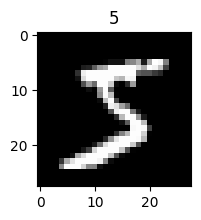

In [3]:
# 첫번째 이미지 출력
plt.figure(figsize=(2,2))
plt.imshow(X_train[0], cmap='gray')
plt.title(y_train[0])
plt.show()

In [9]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name='mnist_784', 
                     version=1, 
                     as_frame=False, #데이터프레임으로 받을지 여부(False: 넘파이 배열)
                     parser='auto')
X, y = mnist.data, mnist.target.astype('int')
X.shape, y.shape

((70000, 784), (70000,))

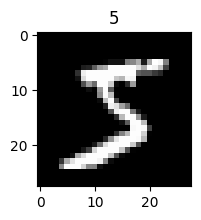

In [10]:
# 첫번째 이미지 출력
plt.figure(figsize=(2,2))
plt.imshow(X_train[0].reshape(28,28), cmap='gray')
plt.title(y_train[0])
plt.show()

# 2절. 분류모형의 종류
- predict()

## 2-1 확률적 모형
- 주어진 데이터에 각 클래스가 정답일 확률을 계산하는 모형
- predict_proba() : 각 분류 클래스별 활률을 알려줌 (일부 판별함수 모형에 있기는 함)
- predict_log_proba() : 확률의 로그값들을 알려줌

### 확률적 생성 모형
- 각 클래스별 특정 데이터 확률분포를 추정하는 방식, 소량의 데이터로도 작동
- ex) QuadraticDiscriminalAnalysis, MultinomialNB

### 확률적 판별 모형
- 확률을 계산하는 함수 이용
- ex) 의사결정나무, 로지스틱 회귀

## 2-2 판별함수 모형
- 주어진 데이터를 클래스에 따라다른 영역으로 나누는 경계면을 찾은 후, 이 경계면을 계산하는 식 => 판별함수
- decision_function()
- ex) perceptron, SVM, MLP(신경망)

=> RandomForest, LGBM, XGBoost, CatBoost 등의 양상블 모형이 더 많이 쓰임

# 3절 모형1. 확률적 생성 모형
- 베이즈 정리를 사용하여 확률분포 계산

## 3-1 QDA
- x가 연속형(실수)이면서 정규분포라고 가정함

In [11]:
# 샘플데이터
from sklearn.datasets import make_classification
X, y = make_classification(n_features=2, # 독립변수 갯수
                           n_informative=2, # 타겟변수에 영향주는 독립 변수 갯수
                           n_redundant=0, # 타겟변수에 영향을 주지 않는 독립변수 갯수
                           n_clusters_per_class=1, # 클래스 내 서브그룹수
                           n_classes=2, # 타켓변수의 class 수
                           n_samples=100, # 데이터 수 (기본값:100)
                           random_state=9 # 시드값
                          )
X.shape, y.shape

((100, 2), (100,))

In [12]:
import numpy as np
np.unique(y)

array([0, 1])

In [13]:
import pandas as pd
pd.Series(y).value_counts()

0    50
1    50
dtype: int64

In [15]:
# y=1로 분류된 데이터의 수
len(X[y==1])

50

In [16]:
# y가 0,1로 되어있기에 평균을 이용하여 갯수 보기
y.mean()

0.5

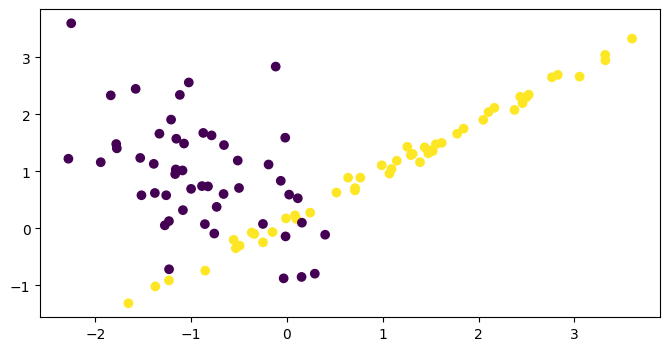

In [18]:
plt.figure(figsize=(8,4))
plt.scatter(x=X[:, 0], y=X[:, 1], c=y)

In [19]:
# (0,0) 기준으로 대칭구조
X[y==1] = -X[y==0]

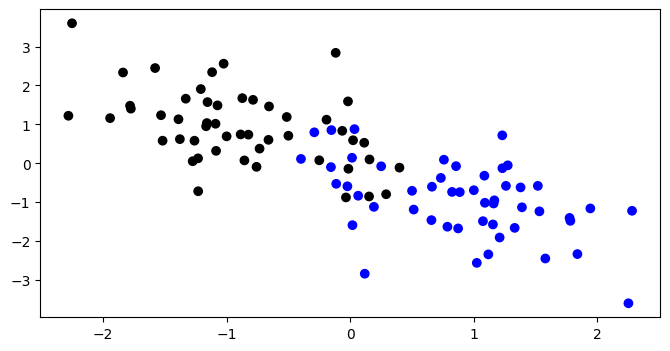

In [21]:
plt.figure(figsize=(8,4))
colors = ['k', 'b']
plt.scatter(x=X[:, 0], y=X[:, 1], c=[colors[i] for i in y])

In [22]:
# QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis()
model.fit(X,y)

QuadraticDiscriminantAnalysis()

In [25]:
x = [[0.5,0], [0,0], [-0.5,0]]
model.predict(x)

array([1, 0, 0])

In [26]:
model.predict_proba(x)

array([[0.16455419, 0.83544581],
       [0.5       , 0.5       ],
       [0.83544581, 0.16455419]])

In [27]:
model.classes_ # 분류될 내용

array([0, 1])

In [28]:
y_hat = model.predict(X)
pd.crosstab(y, y_hat)

col_0,0,1
row_0,,
0,44,6
1,6,44


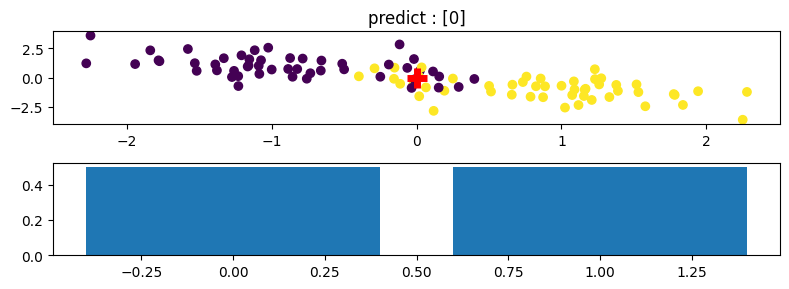

In [35]:
x = [[0,0]]
plt.figure(figsize=(8,3))
p = model.predict_proba(x)
plt.subplot(211) # 2행 1열 subplot에서 첫번째 그래프
plt.scatter(x=X[:,0], y=X[:,1], c=y)
plt.scatter(x=x[0][0], y=x[0][1], c='r', s=200, marker='+', lw=5)
h = model.predict(x)
plt.title(f'predict : {h}')
plt.subplot(212) # 2행 1열 subplot에서 두번째 그래프
plt.bar(model.classes_, p[0])
plt.tight_layout()
plt.show()

## 3-2 나이브베이지안 모형

In [40]:
# 데이터
import seaborn as sns
iris = sns.load_dataset('iris')

# 학습데이터는 numpy 배열
X = iris.iloc[:,:-1].values #넘파이로 변환
y = iris.iloc[:,-1].values #라벨인코딩 없이 넘파이 배열로 변환

# 모형 생성/학습
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X,y)

MultinomialNB()

In [41]:
x = [[5.1, 3.5, 1.4, 0.2]]
h = model.predict(x)
p = model.predict_proba(x)
print('예측 :', h)
print(model.classes_)
print(p)

예측 : ['setosa']
['setosa' 'versicolor' 'virginica']
[[0.75199536 0.16092948 0.08707516]]


<BarContainer object of 3 artists>

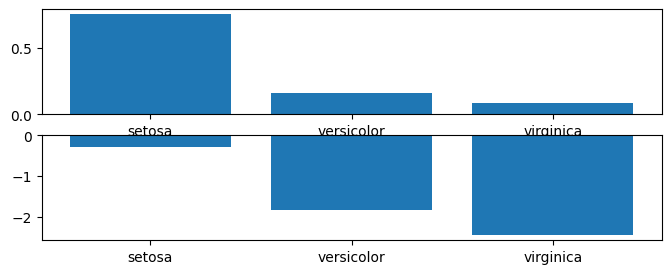

In [42]:
plt.figure(figsize=(8,3))
plt.subplot(211)
plt.bar(model.classes_, model.predict_proba(x)[0])
plt.subplot(2,1,2)
plt.bar(model.classes_, np.log(model.predict_proba(x))[0])


# 4절 모형2. 확률적 판별 모형
## 4-1 로지스틱 회귀분석

In [68]:
# 샘플데이터
from sklearn.datasets import make_classification
X, y = make_classification(n_features=1, # 독립변수 갯수
                           n_informative=1, # 타겟변수에 영향주는 독립 변수 갯수
                           n_redundant=0, # 타겟변수에 영향을 주지 않는 독립변수 갯수
                           n_clusters_per_class=1, # 클래스 내 서브그룹수
                           n_classes=2, # 타켓변수의 class 수
                           n_samples=100, # 데이터 수 (기본값:100)
                           random_state=1 # 시드값
                          )
X.shape, y.shape

((100, 1), (100,))

In [69]:
# 타겟변수의 클래스별 균형
print(y.mean())

0.5


In [70]:
# 모형
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X,y)

In [76]:
# -3 부터 3까지 같은 간격 데이터
xx = np.linspace(-3, 3, 100)
test_x = xx.reshape(-1,1)
y_hat = model.predict(test_x)
prob = model.predict_proba(test_x)

In [77]:
# prob[:,0] # 0으로 분류될 확률
# prob[:,1] # 0으로 분류될 확률

array([9.99986168e-01, 9.99982885e-01, 9.99978824e-01, 9.99973798e-01,
       9.99967580e-01, 9.99959886e-01, 9.99950367e-01, 9.99938589e-01,
       9.99924015e-01, 9.99905984e-01, 9.99883674e-01, 9.99856072e-01,
       9.99821920e-01, 9.99779667e-01, 9.99727391e-01, 9.99662716e-01,
       9.99582704e-01, 9.99483721e-01, 9.99361274e-01, 9.99209810e-01,
       9.99022462e-01, 9.98790750e-01, 9.98504195e-01, 9.98149863e-01,
       9.97711786e-01, 9.97170276e-01, 9.96501065e-01, 9.95674278e-01,
       9.94653171e-01, 9.93392627e-01, 9.91837341e-01, 9.89919677e-01,
       9.87557146e-01, 9.84649494e-01, 9.81075400e-01, 9.76688843e-01,
       9.71315249e-01, 9.64747664e-01, 9.56743349e-01, 9.47021395e-01,
       9.35262277e-01, 9.21110531e-01, 9.04182135e-01, 8.84078339e-01,
       8.60407713e-01, 8.32817681e-01, 8.01035552e-01, 7.64916976e-01,
       7.24496766e-01, 6.80033837e-01, 6.32039590e-01, 5.81279010e-01,
       5.28737154e-01, 4.75550718e-01, 4.22913181e-01, 3.71969602e-01,
      

<BarContainer object of 2 artists>

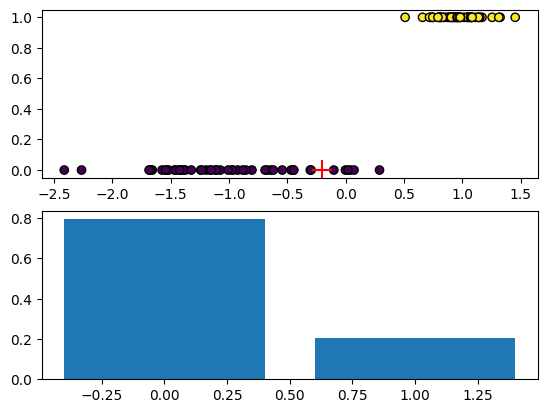

In [83]:
x = [[-0.2]]
plt.subplot(211)
plt.scatter(X, y, c=y, edgecolors='k')
plt.scatter(x[0][0], model.predict(x), s=200, c='r', marker='+')
prob = model.predict_proba(x)[0]
plt.subplot(212)
plt.bar(model.classes_, prob)

## 4-2 의사결정나무
- 여러가지 규칙을 순차저긍로 적용하면서 독립변수 공간을 분할하는 분류모형
- ★ 종속변수에 영향을 주는 독립변수들을 알아보는 목적

In [99]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data[:, 2:] #petal_length, petal_width만 독립변수로 (의사결정나무가 너무 커지는걸 방지하기 위해)
# data.target_names[data.target]
y = data.target
feature_names = [feature[:-5].replace(' ', '_') for feature in data.feature_names[2:]]

In [102]:
# 모형
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='entropy', # 품질기준을 entropy
                                 max_depth=1,
                                 random_state=0)
dt_model.fit(X,y) # depth 1짜리 tree 성능이 좋지 않을 듯

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0)

In [105]:
test_x = [[1.4, 0.2]]
dt_model.predict(test_x)

array([0])

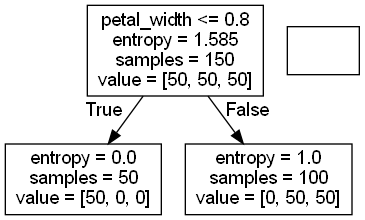

In [108]:
# 생성된 tree 시각화
from sklearn.tree import export_graphviz
import pydot
from IPython.core.display import Image
import io

def draw_decision_tree(model, feature_names):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)
draw_decision_tree(dt_model, feature_names=feature_names)

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def plot_decision_regions(X, y, model, title):
    species = ['setosa', 'versicolor', 'virginica']
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution))
    Z = model.predict(
        np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    
    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
            c=[cmap(idx)], marker=markers[idx], s=80, label=species[cl])
        
    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)
    return Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

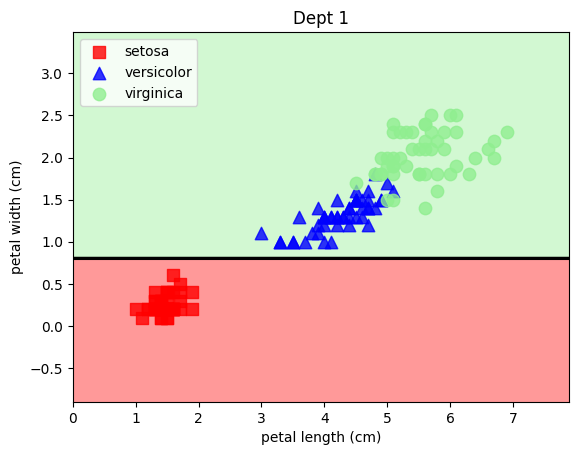

In [113]:
plot_decision_regions(X, y, dt_model, 'Dept 1')

In [115]:
dt_model5 = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dt_model5.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

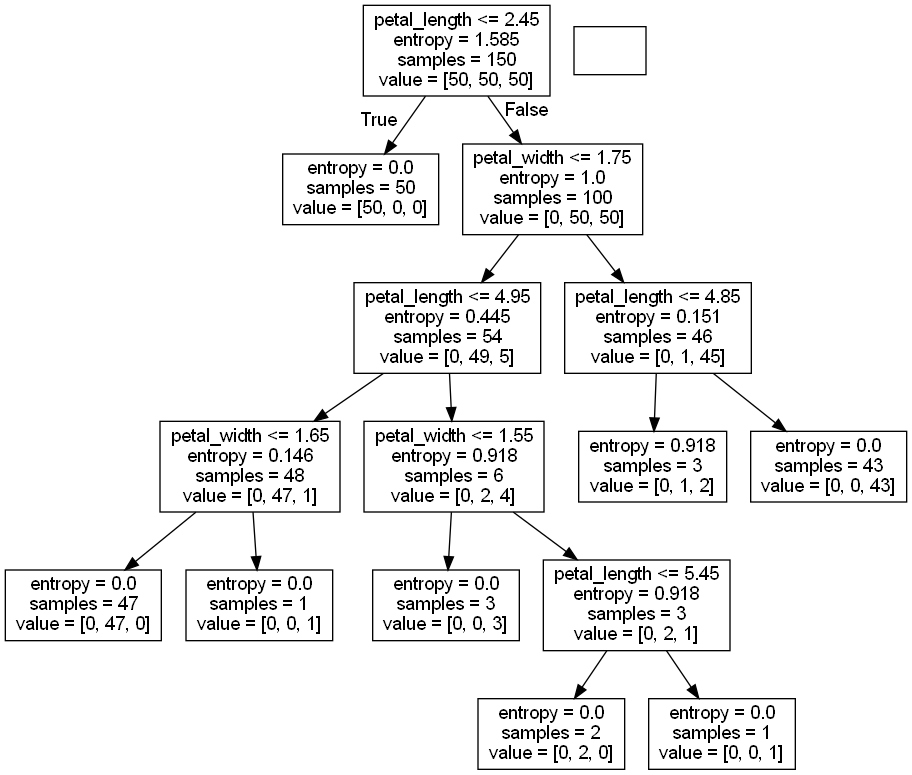

In [116]:
draw_decision_tree(dt_model5, feature_names=feature_names)

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

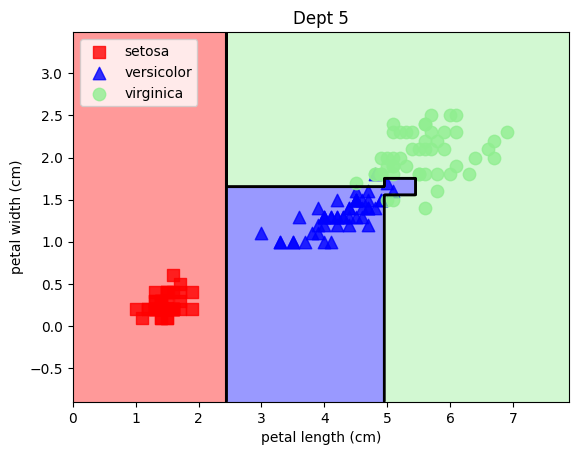

In [117]:
plot_decision_regions(X, y, dt_model5, 'Dept 5')

In [118]:
dt_model5.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# 5절, 모형3 : 판별함수 모형
- 동일한 클래스가 모여있는 영역과 그 영역을 나누는 경계면을 정의
- decision_function() 제공
- perceptron, SVMm 인공신경망모델(일부는 predict_proba도 있음)

## 5-1 Perceptron

In [128]:
iris = load_iris()
idx = np.in1d(iris.target, [0,2])
import pandas as pd
idx = pd.Series(iris.target).isin([0,2]).values

In [131]:
X = iris.data[idx, 0:2]
y = iris.target[idx]

In [133]:
# 퍼셉트론 모형
from sklearn.linear_model import Perceptron
model = Perceptron(max_iter=500, #epoch
                  eta0=0.1, #learning rate
                  random_state=1,
                  ).fit(X,y)

In [134]:
y_hat = model.predict(X)
y_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [135]:
(y != y_hat).sum()

1

In [137]:
X[y!=y_hat]

array([[4.5, 2.3]])

In [139]:
for idx, (real,hat) in enumerate(zip(y, y_hat)):
    # print(idx, real, hat)
    if real != hat:
        print(f"{idx}번째 실제값 : {real}, 예측값 : {hat} = 데이터 : {X[idx]}")

41번째 실제값 : 0, 예측값 : 2 = 데이터 : [4.5 2.3]


In [144]:
test_x = X[41].reshape(-1,2)
print(model.predict(test_x))
print(model.decision_function(test_x))

[2]
[1.24]


In [148]:
test_x = X[77].reshape(1,-1)
print(model.decision_function(test_x))

[2.951]


## 5-2 SVC
- support vector classifier

In [154]:
from sklearn.svm import SVC
model = SVC(probability=True)
model.fit(X,y)

SVC(probability=True)

In [155]:
test_x = X[41].reshape(-1,2)
print(test_x)
print('예측 :', model.predict(test_x))
print('경계면과의 거리 :', model.decision_function(test_x))
print('예측 확률들 :', model.predict_proba(test_x))

[[4.5 2.3]]
예측 : [0]
경계면과의 거리 : [-0.72539221]
[[0.90037159 0.09962841]]


## 5-3 다중 퍼셉트론(인공신경망)
- predict/predict_proba/predict_log_proba

In [159]:
# 데이터 불러오기
from sklearn.datasets import load_iris
iris = load_iris()
iris_X = iris.data
iris_y = iris.target
iris_X.shape, iris_y.shape

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(iris_X, iris_y, stratify=iris_y, test_size=0.3)

In [161]:
# 다중 퍼셉트론 모형
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,50,30), # hidden layer의 unit 수
                   max_iter=500) #epoch
mlp.fit(train_X, train_y)

MLPClassifier(hidden_layer_sizes=(50, 50, 30), max_iter=500)

In [164]:
pred = mlp.predict(test_X)
pd.crosstab(test_y, pred)

col_0,0,1,2
row_0,,,
0,15,0,0
1,0,14,1
2,0,1,14


# 6절. 분류모형 성능평가
## 6-1 sklearn의 모델 평가 방법
- metrics 모듈 : ~_score
- 혼돈행렬을 이용

In [165]:
result = pd.read_csv('data/model_result.csv') # 보험사기자인지 여부 (실제값/예측값)
result.info() # 타입과 결측치, 메모리 사용

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1793 entries, 0 to 1792
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   CUST_ID  1793 non-null   int64
 1   y_true   1793 non-null   int64
 2   y_pred   1793 non-null   int64
dtypes: int64(3)
memory usage: 42.1 KB


In [166]:
# 실제 보험사기자, 보험사기자로 예측
result['y_true'].sum(), result['y_pred'].sum()

(158, 99)

In [167]:
pd.crosstab(result.y_true, result.y_pred, margins=True)

y_pred,0,1,All
y_true,,,
0,1613,22,1635
1,81,77,158
All,1694,99,1793


In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, fbeta_score

In [169]:
confusion_matrix(result.y_true, result.y_pred)

array([[1613,   22],
       [  81,   77]], dtype=int64)

In [170]:
accuracy_score(result.y_true, result.y_pred) #정확도

0.9425543781372002

In [171]:
precision_score(result.y_true, result.y_pred) #정밀도

0.7777777777777778

In [172]:
recall_score(result.y_true, result.y_pred) # 재현율

0.4873417721518987

In [174]:
recall_score(result.y_true, result.y_pred, pos_label=0) #특이도

0.9865443425076452

In [175]:
# 위양성률(fallout : Fprate) : FP/(TN+FP) : 1종 오류 = 1-특이도
1 - recall_score(result.y_true, result.y_pred, pos_label=0)

0.013455657492354778

In [176]:
f1_score(result.y_true, result.y_pred) # recall과 precision의 조화 평균

0.5992217898832685

In [178]:
# beta=1 : f1_score (recall과 precision의 중요도를 똑같이)
print(fbeta_score(result.y_true, result.y_pred, beta=1))
# beta=0.5 : precision의 가중치가 높음 (고객의 만족도가 중요)
print(fbeta_score(result.y_true, result.y_pred, beta=0.5))
# beta=2 : recall의 가중치가 높음(회사의 비용이 중요)
print(fbeta_score(result.y_true, result.y_pred, beta=2))


0.5992217898832685
0.6949458483754513
0.5266757865937073


## 6.2 ROC 커브를 이용한 성능 비교
- 위양성률(FPrate)과 재현율(TPrate)의 변화를 시각화
    - 모델이 양성을 잘 맞추는 능력(TPrate)과 잘못 예측하는 비율(FPrate)을 비교하는 곡선
- 세로축(재현율) -> 높은게 좋음
- 가로축(위양성율)-> 낮은게 좋음

In [4]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, weights=[0.95, 0.05], n_classes=2, random_state=5)
y.sum()

57

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pandas as pd
model1 = LogisticRegression().fit(X,y)
model2 = SVC(gamma=0.0001, C=3000, probability=True).fit(X,y)

In [12]:
# decision_fucnction()이 없는 모델
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(random_state=42).fit(X,y)
pred3 = model3.predict(X)
pd.crosstab(y, pred3)

col_0,0,1
row_0,,
0,943,0
1,0,57


In [13]:
model3.predict_proba(X)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [6]:
pred1 = model1.predict(X)
pd.crosstab(y,pred1, rownames=['실제'], colnames=['예측'])

예측,0,1
실제,,
0,940,3
1,30,27


In [7]:
pred2 = model2.predict(X)
pd.crosstab(y,pred2, rownames=['실제'], colnames=['예측'])

예측,0,1
실제,,
0,940,3
1,30,27


In [14]:
model3.predict_proba(X)[:, 1] # 1일 확률

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

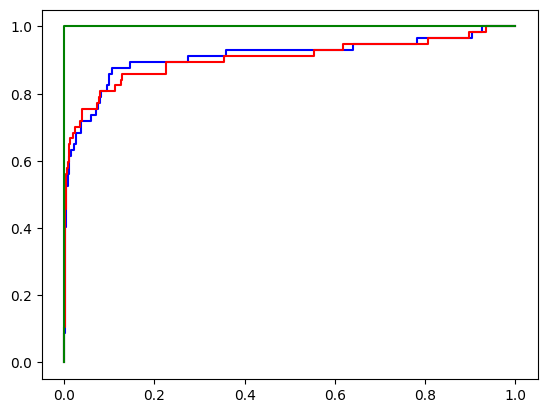

In [16]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr1, tpr1, treshold = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, treshold = roc_curve(y, model2.decision_function(X))
fpr3, tpr3, treshold = roc_curve(y, model3.predict_proba(X)[:, 1])
plt.plot(fpr1, tpr1, c='b')
plt.plot(fpr2, tpr2, c='r')
plt.plot(fpr3, tpr3, c='g')


## 6-3 두 모형의 혼동행렬이 같은 경우
- roc_curve로도 우열을 가리기 힘든 경우 (auc : ROC 밑에 면적
    - auc = 1 : 완벽한 모델
    - auc = 0.5 : 무작위 모델
    - auc < 0.5 : 오히려 반대로 예측하는 경향이 있는 최악의 모델

In [17]:
# roc_curve로부터 얻은 fpr, tpr값으로 auc
from sklearn.metrics import auc
auc(fpr1, tpr1), auc(fpr2, tpr2), auc(fpr3,tpr3)

(0.9112202563673234, 0.9037227214377407, 1.0)